## PAIR PROGRAMMING ESTADÍSTICA II
---

Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando ayer y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.

Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.

Se ruega a la hora de realizar la entrega que incluyáis el conjunto de datos que hayáis decidido emplear para estos ejercicios.

Los objetivos de hoy son:


Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

In [63]:
# Importamos las librerias

import numpy as np
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [64]:
#abrimos el archivo y lo almacenamos en el df sobre el que trabajaremos
df = pd.read_csv("cost_of_living2.csv", index_col = 0)

In [65]:
#Hacemos el analisis exploratorio del DataFrame
#def analisis_exploratorio (datas):
#    return f'Las colummnas son {df.columns}, la forma del DataFrame es {df.shape} y tiene {df.isnull().sum()} valores nulos'

In [66]:
#analisis_exploratorio(df)

In [67]:
df.columns

Index(['indice', 'city', 'country', 'comida_x1_rest', 'comida_x2_rest',
       'menu_mcdonals', 'cerveza_nac_rest_0.5cl', 'cerveza_imp_rest_0.33cl',
       'capuccino_rest', 'coke_rest_0.33cl', 'agua_rest_0.33cl', 'leche_1l',
       'barra_pan', 'arroz_1kg', 'huevos_12ud', 'queso_1kg', 'pollo_1kg',
       'ternera_1kg', 'manzanas_1kg', 'platanos_1kg', 'orange_1kg',
       'tomates_1kg', 'patatas_1kg', 'cebollas_1kg', 'lechuga',
       'agua_super_1.5l', 'botella_vino_super', 'cerveza_nac_super_0.5cl',
       'cerveza_imp_super_0.33cl', 'tabaco_paq_20ud', 'billete_transporte_pub',
       'abono_transporte_pub', 'taxi_start', 'taxi_1km', 'taxi_1h',
       'gasolina_1l', 'volkswagen_coche_nuevo', 'toyota_coche_nuevo',
       'gastos_basicos_apartamento', 'precio_movil_1min', 'internet_mensual',
       'cuota_gym', 'alq_pista_tenis', 'entrada_cine', 'guarderia_mensual',
       'colegio_anual', 'vaqueros_levis', 'vestido_verano', 'deportivas_nike',
       'zapatos_cuero_homb', 'apart_1hab_c

In [102]:
df['patatas_1kg'].value_counts()

1.04    88
1.00    67
2.20    63
0.37    47
1.56    47
        ..
7.69     1
3.53     1
5.31     1
5.68     1
4.09     1
Name: patatas_1kg, Length: 463, dtype: int64

- Utilizando métodos de pandas: media, mediana, moda, máximo y mínimo

In [68]:
mediana_salario= df['media_pond_salario_neto'].median()
moda_salario = df['media_pond_salario_neto'].mode()
media_salario = df['media_pond_salario_neto'].mean()
minimo_salario = df['media_pond_salario_neto'].min()
maximo_salario =df['media_pond_salario_neto'].max()

In [69]:
f'De la columna media ponderada de salario neto la mediana es {mediana_salario}, la moda es {moda_salario[0]}, la media es {media_salario}, el minimo {minimo_salario} y el maximo {maximo_salario}'

'De la columna media ponderada de salario neto la mediana es 1298.37, la moda es 2077.39, la media es 1817.033501011853, el minimo 18.0 y el maximo 12681.26'

In [70]:
mediana_hipoteca= df['interes_hipoteca'].median()
moda_hipoteca = df['interes_hipoteca'].mode()
media_hipoteca = df['interes_hipoteca'].mean()
minimo_hipoteca = df['interes_hipoteca'].min()
maximo_hipoteca =df['interes_hipoteca'].max()

In [71]:
f'De la columna interés hipoteca la mediana es {mediana_hipoteca}, la moda es {moda_hipoteca[0]}, la media es {media_hipoteca}, el minimo {minimo_hipoteca} y el maximo {maximo_hipoteca}'

'De la columna interés hipoteca la mediana es 5.21, la moda es 5.43, la media es 6.527213662044171, el minimo 0.6 y el maximo 61.33'

- Percentiles 25, 75

In [72]:
percentil_salario_25 = np.nanpercentile(df['media_pond_salario_neto'], 25)
percentil_hipoteca_25=np.nanpercentile(df['interes_hipoteca'], 25)
percentil_salario_75 = np.nanpercentile(df['media_pond_salario_neto'], 75)
percentil_hipoteca_75=np.nanpercentile(df['interes_hipoteca'], 75)

In [73]:
f'El percentil 25 de la columna media ponderada del salario neto es {percentil_salario_25}, y el percentil 75 es {percentil_salario_75}'
f'En el caso de la variable interés de hipotecas, encontramos que el percentil 25 es {percentil_hipoteca_25} y el percentil 75 es {percentil_hipoteca_75}'

'En el caso de la variable interés de hipotecas, encontramos que el percentil 25 es 3.0 y el percentil 75 es 8.4975'

- Rango Intercualtílico

In [74]:
q1_salario = percentil_salario_25 
q1_hipoteca = percentil_hipoteca_25
q3_salario = percentil_salario_75
q3_hipoteca = percentil_hipoteca_75

In [75]:
#medida de dispersion estadistica IQR 
intercualitico_salario = q3_salario - q1_salario 
intercualitico_hipoteca = q3_hipoteca - q1_hipoteca

In [76]:
print(intercualitico_salario)
print(intercualitico_hipoteca)

2264.245
5.4975000000000005


- Boxplot de algunas variables

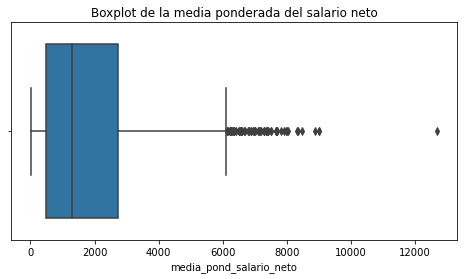

In [77]:
plt.figure(figsize =(8,4))

fig = sns.boxplot( x ='media_pond_salario_neto', data = df)
fig.set_title('Boxplot de la media ponderada del salario neto');



En esta grafica tenemos muchos outliers porque tiene en cuenta los salarios de diferentes países, siendo estos bastante diferentes (países más desarrollados/menos desarrollados)
La mediana nos indica que menos del 50% de la población cobra por debajo de los 2000. 

- Tabla de frecuencias:
    - Variables cualitativas


In [80]:
df_groupby = df.groupby(["country"]).count().reset_index()
df_groupby 


,country,indice,city,comida_x1_rest,comida_x2_rest,menu_mcdonals,cerveza_nac_rest_0.5cl,cerveza_imp_rest_0.33cl,capuccino_rest,coke_rest_0.33cl,...,zapatos_cuero_homb,apart_1hab_centro,apart_1hab_periferia,apart_3hab_centro,apart_3hab_periferia,m2_centro,m2_periferias,media_pond_salario_neto,interes_hipoteca,data_quality
0,Afghanistan,6,6,4,4,4,1,0,4,4,...,2,4,3,3,3,3,3,3,3,6
1,Albania,15,15,15,15,15,15,15,15,15,...,14,11,11,10,10,10,9,12,12,15
2,Algeria,33,33,31,31,31,26,27,29,32,...,30,29,27,28,27,20,20,29,16,33
3,American Samoa,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,Andorra,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Venezuela,18,18,17,15,17,17,17,17,17,...,17,12,12,12,12,8,8,8,10,18
200,Vietnam,21,21,17,17,14,16,17,17,17,...,19,13,11,11,11,10,10,12,17,21
201,Yemen,7,7,5,6,6,4,4,5,5,...,4,2,2,2,2,1,1,2,4,7
202,Zambia,7,7,5,4,4,5,5,5,5,...,4,1,1,1,1,1,0,1,4,7


- Tabla de frecuencias:
    - Variables cuantitativas

In [98]:
df_groupby_cuantitativas = df.groupby(['gasolina_1l']).count().reset_index()
df_groupby_cuantitativas

,gasolina_1l,indice,city,country,comida_x1_rest,comida_x2_rest,menu_mcdonals,cerveza_nac_rest_0.5cl,cerveza_imp_rest_0.33cl,capuccino_rest,...,zapatos_cuero_homb,apart_1hab_centro,apart_1hab_periferia,apart_3hab_centro,apart_3hab_periferia,m2_centro,m2_periferias,media_pond_salario_neto,interes_hipoteca,data_quality
0,0.03,7,7,7,7,7,7,7,7,7,...,4,3,3,3,3,1,2,4,3,7
1,0.04,3,3,3,3,3,3,3,3,3,...,3,2,2,2,2,1,1,1,0,3
2,0.12,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,1,1,1,1
3,0.18,2,2,2,2,2,2,2,2,2,...,2,2,2,1,2,2,2,2,2,2
4,0.19,2,2,2,2,2,2,2,2,2,...,2,1,1,1,1,1,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2.71,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
225,2.74,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,0,0,0,0,1
226,2.76,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
227,3.60,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


- Tabla de frecuencias:
    - Frecuencia acumulada
Representación de al menos una tabla de frecuencias

In [ ]:
df_groupby_cuantitativas['frec_cum_internet'] = df_groupby_cuantitativas['internet_mensual'].cumsum()

In [99]:
df_groupby_cuantitativas['frec_cum_internet'] = df_groupby_cuantitativas['internet_mensual'].cumsum()

In [100]:
df_groupby_cuantitativas.head()

,gasolina_1l,indice,city,country,comida_x1_rest,comida_x2_rest,menu_mcdonals,cerveza_nac_rest_0.5cl,cerveza_imp_rest_0.33cl,capuccino_rest,...,apart_1hab_centro,apart_1hab_periferia,apart_3hab_centro,apart_3hab_periferia,m2_centro,m2_periferias,media_pond_salario_neto,interes_hipoteca,data_quality,frec_cum_internet
0,0.03,7,7,7,7,7,7,7,7,7,...,3,3,3,3,1,2,4,3,7,7
1,0.04,3,3,3,3,3,3,3,3,3,...,2,2,2,2,1,1,1,0,3,10
2,0.12,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,1,1,1,1,10
3,0.18,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,2,2,2,2,12
4,0.19,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,2,2,2,14


- Tabla de frecuencias:
    - Representación de al menos una tabla de frecuencias

In [ ]:
df_group / df_cigar.shape[0]